# Perceptron Algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
df = pd.read_csv('pima_diabetes.csv',header=None)
print(df.head())
df.sort_values([8],inplace=True)
df

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


,0,1,2,3,4,5,6,7,8
383,1,90,62,18,59,25.1,1.268,25,0
465,0,124,56,13,105,21.8,0.452,21,0
466,0,74,52,10,36,27.8,0.269,22,0
467,0,97,64,36,100,36.8,0.600,25,0
469,6,154,78,41,140,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...,...
193,11,135,0,0,0,52.3,0.578,40,1
485,0,135,68,42,250,42.3,0.365,24,1
484,0,145,0,0,0,44.2,0.630,31,1
186,8,181,68,36,495,30.1,0.615,60,1


In [3]:
print(df.shape)
df[8].value_counts()

(768, 9)


0    500
1    268
Name: 8, dtype: int64

In [46]:
# Here we take only first two features
X = df[[1,5]].to_numpy()  # the features
y = df[8] # target
print(X[0],y)

[90.  25.1] 383    0
465    0
466    0
467    0
469    0
      ..
193    1
485    1
484    1
186    1
0      1
Name: 8, Length: 768, dtype: int64


[]

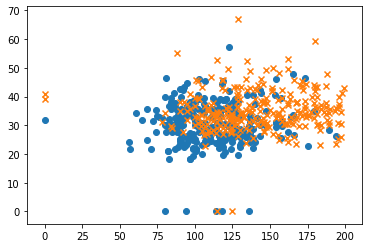

In [47]:
plt.scatter(X[:268,0], X[:268,1], marker='o',label='0')
plt.scatter(X[500:,0], X[500:,1], marker='x',label='1')
plt.plot()

In [48]:
def threshold_func(t):
    if t >=0 :
        return 1
    return 0

def prediction(features, weights, bias):
    return threshold_func(np.matmul(features, weights)+bias)

def perceptron_learning_step(features, y,weights, bias, learn_rate = 0.1):
    for i in range(len(features)):
        y_hat = prediction(features[i],weights,bias)
        if y_hat == 0 and y[i]==1:
            for j in range(len(weights)):
                weights[j] += learn_rate*features[i][j]
            bias += learn_rate
        elif y_hat==1 and y[i]==0:
            for j in range(len(weights)):
                weights[j] -= learn_rate*features[i][j]
            bias -= learn_rate
    return weights,bias

def train_perceptron_algorithm(X, y, learn_rate=0.1, epoochs=5):
    weights = np.array(np.random.rand(2,1))
    bias = np.random.rand(1)[0]
    
    for i in range(epoochs):
        weights,bias = perceptron_learning_step(X,y,weights,bias,learn_rate)
        plt.title("Solution boundary")
        display(-weights[0]/weights[1], -bias/weights[1], 'black')
        if epoochs%10==0:
            plt.plot()

    plt.scatter(X[:268,0], X[:268,1], marker='o',label='0')
    plt.scatter(X[500:,0], X[500:,1], marker='x',label='1')  
    plt.plot()

    
def display(m, b, color='g--'):
    plt.xlim(-50,300)
    plt.ylim(-25,100)
    x = np.arange(-1000, 1000, 1)
    plt.plot(x, m*x+b, color)    

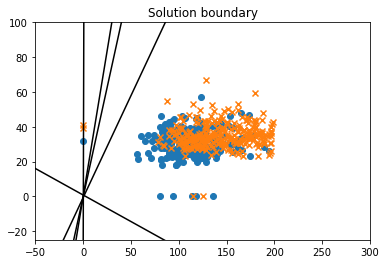

In [49]:
train_perceptron_algorithm(X,y)